In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kannada-mnist/Kannada_MNIST_datataset_paper.zip
/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/kannada_mnist_arxiv_submission.pdf
/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Dig_MNIST/y_dig_MNIST.npz
/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Dig_MNIST/X_dig_MNIST.npz
/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz
/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz
/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz
/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_M

In [24]:
dir = '/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST'

X_trai = np.load(os.path.join(dir,'X_kannada_MNIST_train.npz'))['arr_0']
X_tes = np.load(os.path.join(dir,'X_kannada_MNIST_test.npz'))['arr_0']
y_train = np.load(os.path.join(dir,'y_kannada_MNIST_train.npz'))['arr_0']
y_test = np.load(os.path.join(dir,'y_kannada_MNIST_test.npz'))['arr_0']

print(X_trai.shape, X_tes.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [45]:
X_train = pd.DataFrame(X_trai.reshape(X_trai.shape[0], 784))
X_test = pd.DataFrame(X_tes.reshape(X_tes.shape[0], 784))
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
y_train.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64


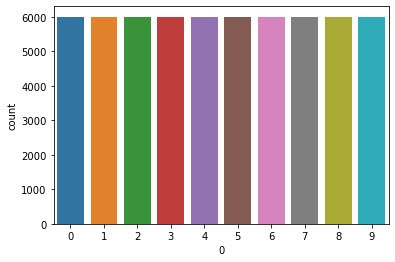

In [36]:
import seaborn as sns
g=sns.countplot(y_train[0])
print(y_train[0].value_counts())



In [39]:
#normalizing data
#greyscale normalization
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train, num_classes=10)


Using TensorFlow backend.


In [47]:
X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)

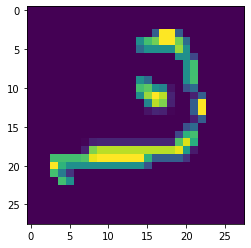

In [48]:
plt.imshow(X_train[2][:,:,0])

In [106]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),##
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [107]:
model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_50 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_51 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 28, 28, 64)      

In [108]:
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [109]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [110]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [111]:
from tensorflow.keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [113]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=40, #Increase this when not on Kaggle kernel
                           verbose=1,  #1 for ETA, 0 for silent
                           callbacks=[annealer])

Epoch 1/40
500/500 [==============================] - 139s 277ms/step - loss: 0.0847 - accuracy: 0.9724 - lr: 0.0010
Epoch 2/40
500/500 [==============================] - 126s 252ms/step - loss: 0.0736 - accuracy: 0.9771 - lr: 9.0000e-04
Epoch 3/40
500/500 [==============================] - 127s 254ms/step - loss: 0.0670 - accuracy: 0.9810 - lr: 8.1000e-04
Epoch 4/40
500/500 [==============================] - 127s 253ms/step - loss: 0.0568 - accuracy: 0.9830 - lr: 7.2900e-04
Epoch 5/40
500/500 [==============================] - 127s 254ms/step - loss: 0.0634 - accuracy: 0.9825 - lr: 6.5610e-04
Epoch 6/40
500/500 [==============================] - 127s 255ms/step - loss: 0.0571 - accuracy: 0.9846 - lr: 5.9049e-04
Epoch 7/40
500/500 [==============================] - 127s 253ms/step - loss: 0.0530 - accuracy: 0.9844 - lr: 5.3144e-04
Epoch 8/40
500/500 [==============================] - 127s 254ms/step - loss: 0.0434 - accuracy: 0.9887 - lr: 4.7830e-04
Epoch 9/40
500/500 [================

In [115]:
result=model.predict(X_test)

In [116]:
y_pred=pd.Series(np.argmax(result, axis=1), name='Label')
y_pred

0       0
1       1
2       2
3       3
4       4
       ..
9995    5
9996    6
9997    7
9998    8
9999    9
Name: Label, Length: 10000, dtype: int64

In [117]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)


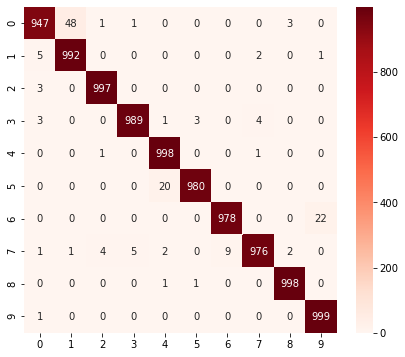

In [118]:
plt.figure(figsize=[7,6])
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [119]:
acc=accuracy_score(y_test, y_pred)
print(acc)

0.9854
